# Particle Identification Task Using Neural Networks

In this project, I will train a classifier to identify type of a particle. There are six particle types: electron, proton, muon, kaon, pion and ghost. Ghost is a particle with other type than the first five or a detector noise. 

Different particle types remain different responses in the detector systems or subdetectors. Thre are five systems: tracking system, ring imaging Cherenkov detector (RICH), electromagnetic and hadron calorimeters, and muon system.

![pid](Images/pid.jpg)

My aim is to identify a particle type using the responses in the detector systems. 

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
import utils

# Read Data File

In [0]:
data = pandas.read_csv('Data/training.csv.gz')

In [5]:
data.head()

,TrackP,TrackNDoFSubdetector2,BremDLLbeElectron,MuonLooseFlag,FlagSpd,SpdE,EcalDLLbeElectron,DLLmuon,RICHpFlagElectron,EcalDLLbeMuon,TrackQualitySubdetector2,FlagPrs,DLLelectron,DLLkaon,EcalE,TrackQualityPerNDoF,DLLproton,PrsDLLbeElectron,FlagRICH1,MuonLLbeBCK,FlagHcal,EcalShowerLongitudinalParameter,Calo2dFitQuality,TrackPt,TrackDistanceToZ,RICHpFlagPion,HcalDLLbeElectron,Calo3dFitQuality,FlagEcal,MuonLLbeMuon,TrackNDoFSubdetector1,RICHpFlagProton,RICHpFlagKaon,GhostProbability,TrackQualitySubdetector1,Label,RICH_DLLbeBCK,FlagRICH2,FlagBrem,HcalDLLbeMuon,TrackNDoF,RICHpFlagMuon,RICH_DLLbeKaon,RICH_DLLbeElectron,HcalE,MuonFlag,FlagMuon,PrsE,RICH_DLLbeMuon,RICH_DLLbeProton
0,74791.156263,15.0,0.232275,1.0,1.0,3.2,-2.505719,6.604153,1.0,1.929960,17.585680,1.0,-6.411697,-7.213295,0.000001,1.467550,-26.667494,-2.730674,1.0,-5.152923,1.0,-999.000000,19.954819,3141.930677,0.613640,1.0,-0.909544,-999.000000,1.0,-0.661823,4.0,1.0,1.0,0.018913,5.366212,Muon,-21.913000,1.0,1.0,1.015345,28.0,1.0,-7.213300,-0.280200,5586.589846,1.0,1.0,10.422315,-2.081143e-07,-24.824400
1,2738.489989,15.0,-0.357748,0.0,1.0,3.2,1.864351,0.263651,1.0,-2.061959,20.230680,1.0,5.453014,0.000006,1531.542000,3.570540,-0.711194,1.773806,1.0,-999.000000,0.0,33.187644,0.037601,199.573653,0.465480,1.0,0.434909,13.667366,1.0,-999.000000,10.0,0.0,0.0,0.351206,9.144749,Ghost,-0.703617,0.0,1.0,-2.394644,32.0,1.0,-0.324317,1.707283,-0.000007,0.0,1.0,43.334935,2.771583e+00,-0.648017
2,2161.409908,17.0,-999.000000,0.0,0.0,-999.0,-999.000000,-999.000000,0.0,-999.000000,11.619878,0.0,-999.000000,-999.000000,-999.000000,0.826442,-999.000000,-999.000000,0.0,-999.000000,0.0,-999.000000,-999.000000,94.829418,0.241891,0.0,-999.000000,-999.000000,0.0,-999.000000,5.0,0.0,0.0,0.195717,1.459992,Ghost,-999.000000,0.0,0.0,-999.000000,27.0,0.0,-999.000000,-999.000000,-999.000000,0.0,0.0,-999.000000,-9.990000e+02,-999.000000
3,15277.730490,20.0,-0.638984,0.0,1.0,3.2,-2.533918,-8.724949,1.0,-3.253981,15.336305,1.0,-10.616585,-39.447507,4385.688000,1.076721,-29.291509,-3.053104,1.0,-999.000000,1.0,231.190351,2.839508,808.631064,0.680705,1.0,-1.504160,1939.259641,1.0,-999.000000,9.0,0.0,1.0,0.003972,22.950573,Pion,-47.223118,1.0,1.0,-0.321242,36.0,1.0,-35.202221,-14.742319,4482.803707,0.0,1.0,2.194175,-3.070819e+00,-29.291519
4,7563.700195,19.0,-0.638962,0.0,1.0,3.2,-2.087146,-7.060422,1.0,-0.995816,10.954629,1.0,-8.144945,26.050386,1220.930044,0.439767,21.386587,-2.730648,1.0,-999.000000,1.0,-794.866475,1.209193,1422.569214,0.575066,1.0,-1.576249,1867.165142,1.0,-999.000000,5.0,0.0,0.0,0.015232,3.516173,Proton,15.304688,0.0,1.0,-1.038026,33.0,1.0,25.084287,-10.272412,5107.554680,0.0,1.0,0.000015,-5.373712e+00,23.653087


### Domain Information

Following quantities stands for
+ **Spd** : Scintillating Pad Detector
+ **Prs** : Preshower
+ **Ecal** : Electromagnetic Calorimeter
+ **Hcal** : Hadronic Calorimeter
+ **Brem** : Denotes traces of the Particles that were deflected by Detector.

Column Descripions are as follows:

- ***ID*** : id value for tracks (presents only in the test file for the submitting purposes)
- ***Label*** : string valued observable denoting particle types. Can take values "Electron", "Muon", "Kaon", "Proton", "Pion" and "Ghost". This column is absent in the test file.
- ***FlagSpd*** : flag (0 or 1), if reconstructed track passes through Spd
- ***FlagPrs*** : flag (0 or 1), if reconstructed track passes through Prs
- ***FlagBrem*** : flag (0 or 1), if reconstructed track passes through Brem
- ***FlagEcal*** : flag (0 or 1), if reconstructed track passes through Ecal
- ***FlagHcal*** : flag (0 or 1), if reconstructed track passes through Hcal
- ***FlagRICH1*** : flag (0 or 1), if reconstructed track passes through the first RICH detector
- ***FlagRICH2*** : flag (0 or 1), if reconstructed track passes through the second RICH detector
- ***FlagMuon*** : flag (0 or 1), if reconstructed track passes through muon stations (Muon)
- ***SpdE*** : energy deposit associated to the track in the Spd
- ***PrsE*** : energy deposit associated to the track in the Prs
- ***EcalE*** : energy deposit associated to the track in the Hcal
- ***HcalE*** : energy deposit associated to the track in the Hcal
- ***PrsDLLbeElectron*** : delta log-likelihood for a particle candidate to be electron using information from Prs
- ***BremDLLbeElectron*** : delta log-likelihood for a particle candidate to be electron using information from Brem
- ***TrackP*** : particle momentum
- ***TrackPt*** : particle transverse momentum
- ***TrackNDoFSubdetector1*** : number of degrees of freedom for track fit using hits in the tracking sub-detector1
- ***TrackQualitySubdetector1*** : chi2 quality of the track fit using hits in the tracking sub-detector1
- ***TrackNDoFSubdetector2*** : number of degrees of freedom for track fit using hits in the tracking sub-detector2
- ***TrackQualitySubdetector2*** : chi2 quality of the track fit using hits in the  tracking sub-detector2
- ***TrackNDoF*** : number of degrees of freedom for track fit using hits in all tracking sub-detectors
- ***TrackQualityPerNDoF*** : chi2 quality of the track fit per degree of freedom
- ***TrackDistanceToZ*** : distance between track and z-axis (beam axis)
- ***Calo2dFitQuality*** : quality of the 2d fit of the clusters in the calorimeter 
- ***Calo3dFitQuality*** : quality of the 3d fit in the calorimeter with assumption that particle was electron
- ***EcalDLLbeElectron*** : delta log-likelihood for a particle candidate to be electron using information from Ecal
- ***EcalDLLbeMuon*** : delta log-likelihood for a particle candidate to be muon using information from Ecal
- ***EcalShowerLongitudinalParameter*** : longitudinal parameter of Ecal shower
- ***HcalDLLbeElectron*** : delta log-likelihood for a particle candidate to be electron using information from Hcal
- ***HcalDLLbeMuon*** : delta log-likelihood for a particle candidate to be using information from Hcal
- ***RICHpFlagElectron*** : flag (0 or 1) if momentum is greater than threshold for electrons to produce Cherenkov light
- ***RICHpFlagProton*** : flag (0 or 1) if momentum is greater than threshold for protons to produce Cherenkov light
- ***RICHpFlagPion*** : flag (0 or 1) if momentum is greater than threshold for pions to produce Cherenkov light
- ***RICHpFlagKaon*** : flag (0 or 1) if momentum is greater than threshold for kaons to produce Cherenkov light
- ***RICHpFlagMuon*** : flag (0 or 1) if momentum is greater than threshold for muons to produce Cherenkov light
- ***RICH_DLLbeBCK *** : delta log-likelihood for a particle candidate to be background using information from RICH
- ***RICH_DLLbeKaon*** : delta log-likelihood for a particle candidate to be kaon using information from RICH
- ***RICH_DLLbeElectron*** : delta log-likelihood for a particle candidate to be electron using information from RICH
- ***RICH_DLLbeMuon*** : delta log-likelihood for a particle candidate to be muon using information from RICH
- ***RICH_DLLbeProton*** : delta log-likelihood for a particle candidate to be proton using information from RICH
- ***MuonFlag*** : muon flag (is this track muon) which is determined from muon stations
- ***MuonLooseFlag*** : muon flag (is this track muon) which is determined from muon stations using looser criteria
- ***MuonLLbeBCK*** : log-likelihood for a particle candidate to be not muon using information from muon stations
- ***MuonLLbeMuon*** : log-likelihood for a particle candidate to be muon using information from muon stations
- ***DLLelectron*** : delta log-likelihood for a particle candidate to be electron using information from all subdetectors
- ***DLLmuon*** : delta log-likelihood for a particle candidate to be muon using information from all subdetectors
- ***DLLkaon*** : delta log-likelihood for a particle candidate to be kaon using information from all subdetectors
- ***DLLproton*** : delta log-likelihood for a particle candidate to be proton using information from all subdetectors
- ***GhostProbability*** : probability for a particle candidate to be ghost track. This variable is an output of classification model used in the tracking algorithm.

Delta log-likelihood in the features descriptions means the difference between log-likelihood for the mass hypothesis that a given track is left by some particle (for example, electron) and log-likelihood for the mass hypothesis that a given track is left by a pion (so, DLLpion = 0 and thus we don't have these columns). This is done since most tracks (~80%) are left by pions and in practice we actually need to discriminate other particles from pions. In other words, the null hypothesis is that particle is a pion.

In [6]:
# Classification Labels

set(data.Label)

{'Electron', 'Ghost', 'Kaon', 'Muon', 'Pion', 'Proton'}

In [7]:
# Converting Labels into Numerical Factor

data['Class'] = utils.get_class_ids(data.Label.values)
set(data.Class)

{0, 1, 2, 3, 4, 5}

### Training Features

The following set of features describe particle responses in the detector systems:

![features](Images/features.jpeg)

Also there are several combined features. The full list is following.

In [8]:
features = list(set(data.columns) - {'Label', 'Class'})
features

['FlagMuon',
 'MuonFlag',
 'RICH_DLLbeBCK',
 'TrackQualitySubdetector1',
 'BremDLLbeElectron',
 'TrackNDoFSubdetector1',
 'DLLmuon',
 'HcalE',
 'Calo3dFitQuality',
 'DLLelectron',
 'DLLproton',
 'FlagBrem',
 'RICHpFlagProton',
 'MuonLLbeMuon',
 'TrackNDoF',
 'FlagRICH1',
 'EcalDLLbeElectron',
 'FlagRICH2',
 'EcalDLLbeMuon',
 'DLLkaon',
 'FlagSpd',
 'EcalE',
 'TrackQualityPerNDoF',
 'PrsDLLbeElectron',
 'RICHpFlagPion',
 'RICH_DLLbeElectron',
 'MuonLLbeBCK',
 'TrackPt',
 'RICHpFlagMuon',
 'RICH_DLLbeKaon',
 'PrsE',
 'HcalDLLbeElectron',
 'HcalDLLbeMuon',
 'RICH_DLLbeMuon',
 'FlagEcal',
 'FlagHcal',
 'RICH_DLLbeProton',
 'TrackP',
 'TrackQualitySubdetector2',
 'Calo2dFitQuality',
 'GhostProbability',
 'TrackDistanceToZ',
 'TrackNDoFSubdetector2',
 'RICHpFlagElectron',
 'EcalShowerLongitudinalParameter',
 'MuonLooseFlag',
 'SpdE',
 'RICHpFlagKaon',
 'FlagPrs']

### Feature Engineering

In [0]:
from sklearn.preprocessing import MinMaxScaler
from itertools import combinations

In [0]:
# Adding New Features

def add_features(data):
    trans = MinMaxScaler()
    data["TRACK"] = (1e-20 + trans.fit_transform(data[[x for x in data.columns if "track" in x.lower()]])).prod(axis=1)
    data["RICH"] = (1e-20 + trans.fit_transform(data[[x for x in data.columns if "rich" in x.lower()]])).prod(axis=1)
    data["ELECTRO"] = (1e-20 + trans.fit_transform(data[[x for x in data.columns if "ecal" in x.lower()]])).prod(axis=1)
    data["HADRON"] = (1e-20 + trans.fit_transform(data[[x for x in data.columns if "hcal" in x.lower()]])).prod(axis=1)
    data["MUON"] = (1e-20 + trans.fit_transform(data[[x for x in data.columns if "muon" in x.lower() and 
                                                                                 "rich" not in x.lower() and 
                                                                                 "ecal" not in x.lower()]])).prod(axis=1)
    
    for a,b in combinations(["TRACK", "RICH", "ELECTRO", "HADRON", "MUON"], 2):
        data["{}__X__{}".format(a.lower(), b.lower())] = data[a] * data[b]

    mask_df = 1 * (data[ data.columns[data.min() == -999] ] != -999)
    mask_df.columns = [x+"_mask" for x in mask_df.columns]

    square_df = 0
    if "Label" in data.columns:
        square_df = data.drop("Label", axis=1) **2
    else:
        square_df = data**2
    square_df.columns = [x+"_sq" for x in square_df.columns]

    data = pandas.concat([data, mask_df, square_df], axis=1)

    return data

In [0]:
# Update the Features list

features = list(set(data.columns) - {'Label', 'Class'})

# Data Splits

In [0]:
training_data, validation_data = train_test_split(data, random_state=11, train_size=0.90)

In [13]:
len(training_data), len(validation_data)

(1080000, 120000)

# Neural Network Classifier

In [14]:
from keras.layers.core import Dense, Activation, Dropout, Reshape
from keras.layers.advanced_activations import LeakyReLU, PReLU, ReLU, Softmax
from keras.layers.normalization import BatchNormalization
from keras.layers import Input, Embedding, multiply
import keras.initializers as inits
from keras.models import Sequential, Model
from keras.optimizers import Adam
from keras.utils import np_utils

Using TensorFlow backend.


In [0]:
def classifier(input_dim):
    model = Sequential()
    model.add(Dense(100, input_dim=input_dim, kernel_initializer=inits.glorot_normal()))
    model.add(BatchNormalization())
    model.add(ReLU())
    
    model.add(Dense(100, kernel_initializer=inits.glorot_normal()))
    model.add(BatchNormalization())
    model.add(ReLU())

    model.add(Dense(6, kernel_initializer=inits.glorot_normal()))
    model.add(Softmax())

    model.compile(loss='categorical_crossentropy', optimizer=Adam())
    return model

### Data Preprocessing

In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
sd_obj = StandardScaler()
sd_obj.fit(training_data[features].values)

X_train = sd_obj.transform(training_data[features].values)

### Training

In [96]:
nn = classifier(X_train.shape[1])

nn.fit(X_train, 
      np_utils.to_categorical(training_data.Class.values), 
      verbose=1, 
      epochs=10, 
      batch_size=256)

Epoch 1/10
1080000/1080000 [==============================] - 24s 22us/step - loss: 0.7319
Epoch 2/10
1080000/1080000 [==============================] - 24s 22us/step - loss: 0.6474
Epoch 3/10
1080000/1080000 [==============================] - 23s 21us/step - loss: 0.6374
Epoch 4/10
1080000/1080000 [==============================] - 24s 22us/step - loss: 0.6312
Epoch 5/10
 755456/1080000 [===================>..........] - ETA: 7s - loss: 0.6278

KeyboardInterrupt: ignored

### Log Loss on the Validation sample

In [0]:
X_valid = sd_obj.transform(validation_data[features].values)

In [20]:
# Prediction for each Track [Aim: Hit lower than or equal to 0.525]

proba_nn = nn.predict_proba(X_valid)
log_loss(validation_data.Class.values, proba_nn)

0.5781813828448518

### Quality Metrics

Plotting ROC curves and signal efficiency dependece from particle mometum and transverse momentum values.

In [0]:
proba = proba_nn

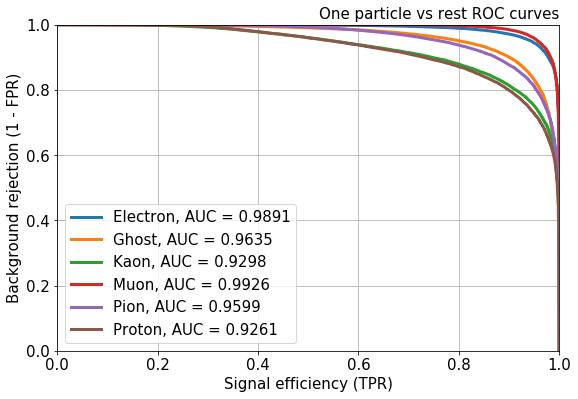

In [22]:
utils.plot_roc_curves(proba, validation_data.Class.values)

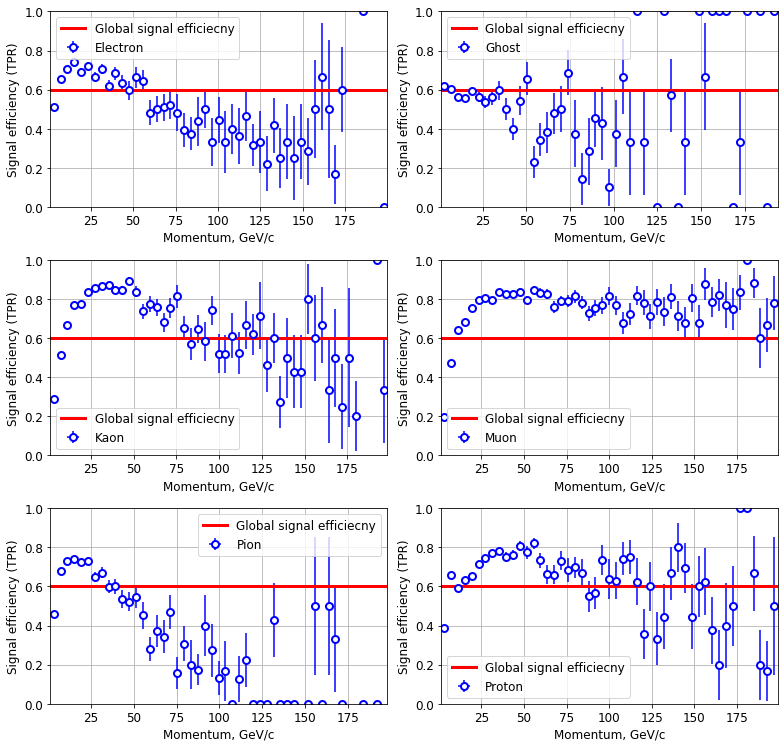

In [23]:
utils.plot_signal_efficiency_on_p(proba, validation_data.Class.values, validation_data.TrackP.values, 60, 50)
plt.show()

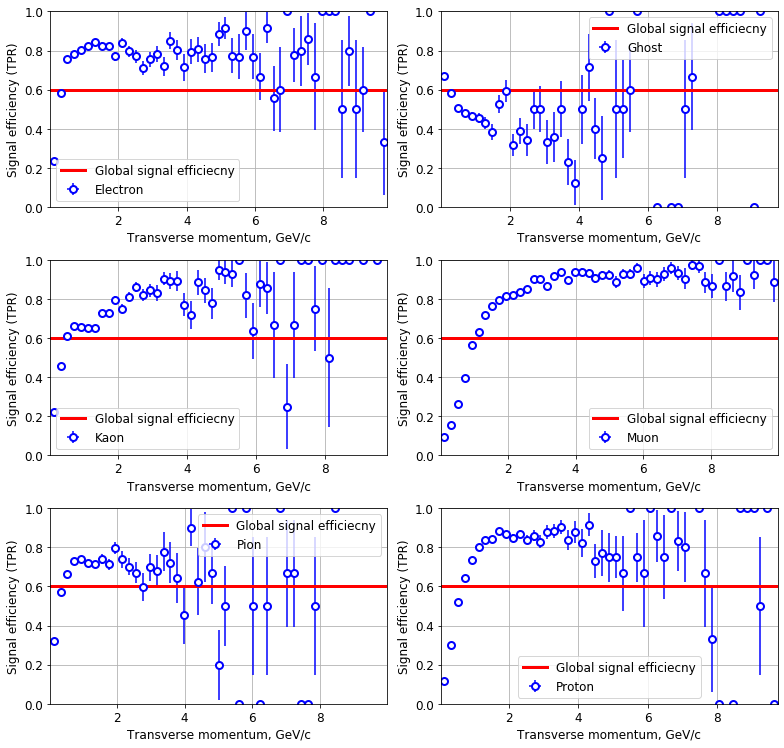

In [24]:
utils.plot_signal_efficiency_on_pt(proba, validation_data.Class.values, validation_data.TrackPt.values, 60, 50)
plt.show()

# Decorrelation Using Adversarial Neural Network

In [0]:
from keras.utils.generic_utils import Progbar
from collections import defaultdict

In [0]:
def classifier(input_dim):
    model = Sequential()
    model.add(Dense(100, kernel_initializer=inits.glorot_normal()))
    model.add(BatchNormalization())
    model.add(ReLU())
    model.add(Dense(100, kernel_initializer=inits.glorot_normal()))
    model.add(BatchNormalization())
    model.add(ReLU())
    
    particle = Input(shape=(input_dim,))
    features = model(particle)

    # first output (name=generation) is whether or not the discriminator
    # thinks the image that is being shown is fake, and the second output
    # (name=auxiliary) is the class that the discriminator thinks the image
    # belongs to.
    fake = Dense(1, activation='sigmoid', name='generation', kernel_initializer=inits.glorot_normal())(features)
    aux = Dense(num_classes, activation='softmax', name='auxiliary', kernel_initializer=inits.glorot_normal())(features)

    return Model(particle, [fake, aux])

In [0]:
def adversary(latent_size, input_dim, num_classes):
    model = Sequential()
    model.add(Dense(100, kernel_initializer=inits.glorot_normal()))
    model.add(BatchNormalization())
    model.add(LeakyReLU())
    model.add(Dense(100, kernel_initializer=inits.glorot_normal()))
    model.add(BatchNormalization())
    model.add(LeakyReLU())
    model.add(Dense(input_dim, kernel_initializer=inits.glorot_normal()))

    # Z Space
    latent = Input(shape=(latent_size, ))

    # Label
    particle_class = Input(shape=(1,), dtype='int32')

    cls = Embedding(num_classes, latent_size, embeddings_initializer='glorot_normal')(particle_class)

    # Hadamard Product between z-space and a Class Conditional Embedding
    h = multiply([latent, cls])
    h = Reshape((latent_size,))(h)
    fake_data = model(h)

    return Model([latent, particle_class], fake_data)

In [0]:
temp = adversary(100, 49, 6)
res = temp.predict([np.random.randn(4,100), np.random.randint(0,6,4)])

In [0]:
latent_size = 100
num_classes = 6

In [175]:
# build the discriminator
discriminator = classifier(X_train.shape[1])
discriminator.compile(
        optimizer=Adam(),
        loss=['binary_crossentropy', 'categorical_crossentropy']
    )
discriminator.summary()

Model: "model_22"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_39 (InputLayer)           (None, 49)           0                                            
__________________________________________________________________________________________________
sequential_22 (Sequential)      (None, 100)          15900       input_39[0][0]                   
__________________________________________________________________________________________________
generation (Dense)              (None, 1)            101         sequential_22[1][0]              
__________________________________________________________________________________________________
auxiliary (Dense)               (None, 6)            606         sequential_22[1][0]              
Total params: 16,607
Trainable params: 16,207
Non-trainable params: 400
___________________

In [182]:
# build the generator
generator = adversary(latent_size, len(features), num_classes)

latent = Input(shape=(latent_size, ))
particle_class = Input(shape=(1,), dtype='int32')

# get a fake image
fake = generator([latent, image_class])

# we only want to be able to train generation for the combined model
discriminator.trainable = False
fake, aux = discriminator(fake)
combined = Model([latent, image_class], [fake, aux])

combined.compile(
    optimizer=Adam(),
    loss=['binary_crossentropy', 'categorical_crossentropy']
)
combined.summary()

Model: "model_26"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_46 (InputLayer)           (None, 100)          0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            (None, 1)            0                                            
__________________________________________________________________________________________________
model_25 (Model)                (None, 49)           26549       input_46[0][0]                   
                                                                 input_4[0][0]                    
__________________________________________________________________________________________________
model_22 (Model)                [(None, 1), (None, 6 16607       model_25[1][0]            

### Training

In [0]:
epochs = 10
batch_size = 256

In [0]:
X_train = training_data[features].values
y_train = training_data.Class.values

X_test = validation_data[features].values
y_test = validation_data.Class.values

In [0]:
num_train, num_test = X_train.shape[0], X_test.shape[0]

train_history = defaultdict(list)
test_history = defaultdict(list)

In [0]:
for epoch in range(1, epochs + 1):
    print('Epoch {}/{}'.format(epoch, epochs))

    num_batches = int(np.ceil(X_train.shape[0] / float(batch_size)))
    progress_bar = Progbar(target=num_batches*batch_size)

    epoch_gen_loss = []
    epoch_disc_loss = []

    for index in range(num_batches):
        # get a batch of real images
        image_batch = X_train[index * batch_size:(index + 1) * batch_size]
        label_batch = y_train[index * batch_size:(index + 1) * batch_size]

        # generate a new batch of noise
        noise = np.random.uniform(-1, 1, (len(image_batch), latent_size))

        # sample some labels from p_c
        sampled_labels = np.random.randint(0, num_classes, len(image_batch))

        # generate a batch of fake images, using the generated labels as a
        # conditioner. We reshape the sampled labels to be
        # (len(image_batch), 1) so that we can feed them into the embedding
        # layer as a length one sequence
        generated_images = generator.predict(
            [noise, sampled_labels.reshape((-1, 1))], verbose=0)

        x = np.concatenate((image_batch, generated_images))

        # use one-sided soft real/fake labels
        # Salimans et al., 2016
        # https://arxiv.org/pdf/1606.03498.pdf (Section 3.4)
        soft_zero, soft_one = 0, 0.95
        y = np.array(
            [soft_one] * len(image_batch) + [soft_zero] * len(image_batch))
        aux_y = np.eye(num_classes)[np.concatenate((label_batch, sampled_labels), axis=0)]

        # we don't want the discriminator to also maximize the classification
        # accuracy of the auxiliary classifier on generated images, so we
        # don't train discriminator to produce class labels for generated
        # images (see https://openreview.net/forum?id=rJXTf9Bxg).
        # To preserve sum of sample weights for the auxiliary classifier,
        # we assign sample weight of 2 to the real images.
        disc_sample_weight = [np.ones(2 * len(image_batch)),
                              np.concatenate((np.ones(len(image_batch)) * 2,
                                              np.zeros(len(image_batch))))]

        # see if the discriminator can figure itself out...
        epoch_disc_loss.append(discriminator.train_on_batch(
            x, [y, aux_y], sample_weight=disc_sample_weight))

        # make new noise. we generate 2 * batch size here such that we have
        # the generator optimize over an identical number of images as the
        # discriminator
        noise = np.random.uniform(-1, 1, (2 * len(image_batch), latent_size))
        sampled_labels = np.random.randint(0, num_classes, 2 * len(image_batch))

        # we want to train the generator to trick the discriminator
        # For the generator, we want all the {fake, not-fake} labels to say
        # not-fake
        trick = np.ones(2 * len(image_batch)) * soft_one

        epoch_gen_loss.append(combined.train_on_batch(
            [noise, sampled_labels.reshape((-1, 1))],
            [trick, np.eye(num_classes)[sampled_labels]]))

        progress_bar.update((index + 1)*batch_size)

    print('Testing for epoch {}:'.format(epoch))

    # evaluate the testing loss here

    # generate a new batch of noise
    noise = np.random.uniform(-1, 1, (num_test, latent_size))

    # sample some labels from p_c and generate images from them
    sampled_labels = np.random.randint(0, num_classes, num_test)
    generated_images = generator.predict(
        [noise, sampled_labels.reshape((-1, 1))], verbose=False)

    x = np.concatenate((X_test, generated_images))
    y = np.array([1] * num_test + [0] * num_test)
    aux_y = np.eye(num_classes)[np.concatenate((y_test, sampled_labels), axis=0)]

    # see if the discriminator can figure itself out...
    discriminator_test_loss = discriminator.evaluate(
        x, [y, aux_y], verbose=False)

    discriminator_train_loss = np.mean(np.array(epoch_disc_loss), axis=0)

    # make new noise
    noise = np.random.uniform(-1, 1, (2 * num_test, latent_size))
    sampled_labels = np.random.randint(0, num_classes, 2 * num_test)

    trick = np.ones(2 * num_test)

    generator_test_loss = combined.evaluate(
        [noise, sampled_labels.reshape((-1, 1))],
        [trick, np.eye(num_classes)[sampled_labels]], verbose=False)

    generator_train_loss = np.mean(np.array(epoch_gen_loss), axis=0)

    # generate an epoch report on performance
    train_history['generator'].append(generator_train_loss)
    train_history['discriminator'].append(discriminator_train_loss)

    test_history['generator'].append(generator_test_loss)
    test_history['discriminator'].append(discriminator_test_loss)

    print('{0:<22s} | {1:4s} | {2:15s} | {3:5s}'.format(
        'component', *discriminator.metrics_names))
    print('-' * 65)

    ROW_FMT = '{0:<22s} | {1:<4.2f} | {2:<15.4f} | {3:<5.4f}'
    print(ROW_FMT.format('generator (train)',
                          *train_history['generator'][-1]))
    print(ROW_FMT.format('generator (test)',
                          *test_history['generator'][-1]))
    print(ROW_FMT.format('discriminator (train)',
                          *train_history['discriminator'][-1]))
    print(ROW_FMT.format('discriminator (test)',
                          *test_history['discriminator'][-1]))

Epoch 1/10


/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:493: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


   1280/1080064 [..............................] - ETA: 1:29:34

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:493: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


1080064/1080064 [==============================] - 166s 154us/step
Testing for epoch 1:
component              | loss | generation_loss | auxiliary_loss
-----------------------------------------------------------------
generator (train)      | 0.57 | 0.4650          | 0.1058
generator (test)       | 10.44 | 10.1233         | 0.3128
discriminator (train)  | 1.99 | 0.1067          | 1.8878
discriminator (test)   | 11.44 | 6.4378          | 5.0011
Epoch 2/10
1080064/1080064 [==============================] - 166s 154us/step
Testing for epoch 2:
component              | loss | generation_loss | auxiliary_loss
-----------------------------------------------------------------
generator (train)      | 0.36 | 0.3253          | 0.0366
generator (test)       | 16.14 | 15.9528         | 0.1844
discriminator (train)  | 1.66 | 0.1002          | 1.5568
discriminator (test)   | 12.81 | 7.8770          | 4.9348
Epoch 3/10
 251392/1080064 [=====>........................] - ETA: 1:59

Th warning in the previous cell are misleading. [Source](https://github.com/keras-team/keras/issues/8585)